In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
data = pd.read_csv('data/Orders.csv')

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [105]:
data[['Profit','Sales']].head()

,Profit,Sales
0,$62.15,$221.98
1,-$288.77,"$3,709.40"
2,$919.97,"$5,175.17"
3,-$96.54,"$2,892.51"
4,$311.52,"$2,832.96"


In [106]:
data.Sales = pd.to_numeric(data.Sales.str.replace('[$,]',''))

In [107]:
data.Profit = pd.to_numeric(data.Profit.str.replace('[$,]',''))

In [108]:
data.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [109]:
data['Order.Date'] = pd.to_datetime(data['Order.Date'])

In [110]:
data.dtypes

Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date                 object
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
dtype: object

In [111]:
data_group = data[['Quantity','Order.Date']].groupby('Order.Date').sum()

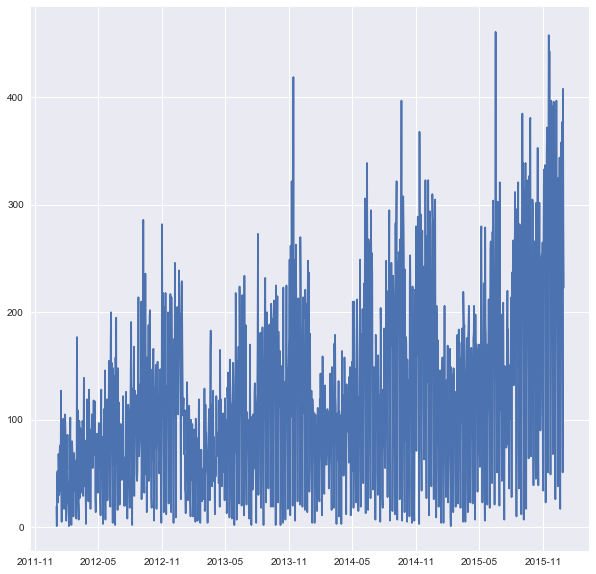

In [112]:
plt.figure(figsize = (10,10))
plt.plot(data_group)

In [113]:
category_group = data[['Quantity','Category','Order.Date']].groupby(['Category','Order.Date']).sum()

In [115]:
category_group['Category'].unique()

KeyError: 'Category'

In [116]:
category_group = category_group.reset_index()

In [117]:
furniture = category_group[category_group.Category == 'Furniture']

In [118]:
furniture_plot = furniture[['Order.Date','Quantity']]

In [119]:
furniture_plot

,Order.Date,Quantity
0,2012-01-01,5
1,2012-01-03,16
2,2012-01-04,7
3,2012-01-05,1
4,2012-01-06,3
5,2012-01-07,11
6,2012-01-08,15
7,2012-01-10,3
8,2012-01-11,23
9,2012-01-12,12


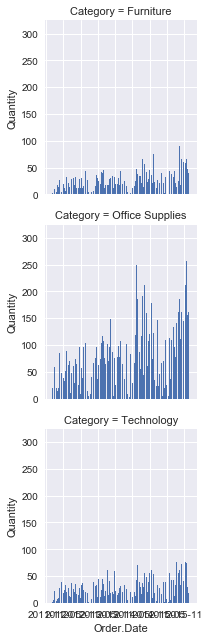

In [121]:
grid = sns.FacetGrid(category_group, row='Category')
grid.map(plt.bar, 'Order.Date', 'Quantity')

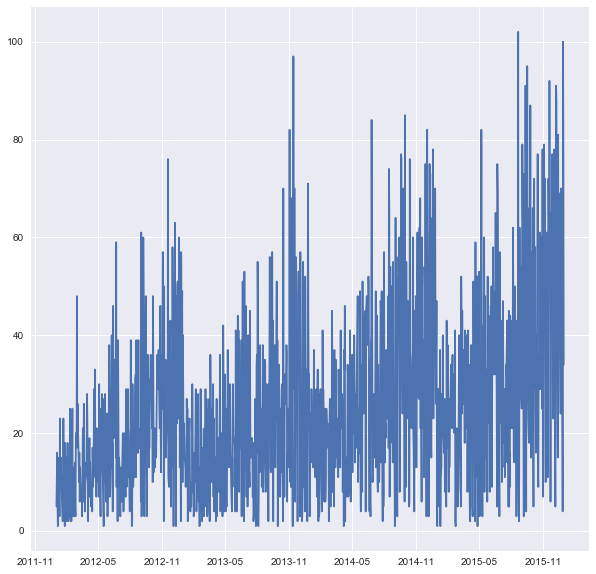

In [122]:
plt.figure(figsize = (10,10))
plt.plot(furniture_plot['Order.Date'], furniture_plot['Quantity'])

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?

In [123]:
returns = pd.read_csv('Data/returns.csv')

In [128]:
returns

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
5,Yes,ID-2013-AB1001527-41439,Eastern Asia
6,Yes,ES-2015-RA1994545-42218,Western Europe
7,Yes,CA-2014-TB21280140-41724,Central US
8,Yes,ES-2014-JF15295120-41924,Southern Europe
9,Yes,IN-2014-NM1844527-41800,Eastern Asia


In [152]:
new_return = returns.merge(data, left_on = ['Order ID','Region'], right_on = ['Order.ID','Region'])

In [133]:
return_group = new_return[new_return['Returned'] == 'Yes'].Profit.sum()

	2. How many customer returned more than once? more than 5 times?

In [140]:
customer_return = new_return[['Returned','Customer.ID']].groupby('Customer.ID').count()

In [144]:
customer_return.loc[customer_return['Returned'] > 1,].count()

Returned    547
dtype: int64

In [145]:
customer_return.loc[customer_return['Returned'] > 5,].count()

Returned    46
dtype: int64

	3. Which regions are more likely to return orders?

In [153]:
new_return.head()

,Returned,Order ID,Region,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,Yes,CA-2012-SA20830140-41210,Central US,31784,CA-2012-SA20830140-41210,2012-10-28,10/30/12,First Class,SA-208301402,Sue Ann Reed,...,TEC-PH-3138,Technology,Phones,Apple iPhone 5S,2735.95,6,0.2,341.99,752.51,High
1,Yes,IN-2012-PB19210127-41259,Eastern Asia,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,...,FUR-TA-5060,Furniture,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.57,Critical
2,Yes,IN-2012-PB19210127-41259,Eastern Asia,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,...,FUR-BO-5762,Furniture,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.27,Critical
3,Yes,IN-2012-PB19210127-41259,Eastern Asia,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,...,FUR-TA-5065,Furniture,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.97,Critical
4,Yes,IN-2012-PB19210127-41259,Eastern Asia,30193,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,...,FUR-CH-5454,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.92,Critical


In [154]:
region_return = new_return[['Returned','Region']].groupby('Region').count()

In [159]:
region_return.sort_values(by = 'Returned', ascending = False)

,Returned
Region,
Central America,248
Western Europe,233
Western US,177
Oceania,154
Southeastern Asia,140
Eastern US,134
South America,133
Eastern Asia,131
Southern Europe,112


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [160]:
region_return = new_return[['Sub.Category','Region']].groupby('Sub.Category').count()

In [166]:
region_return.sort_values('Region', ascending = False)

,Region
Sub.Category,
Binders,263
Art,216
Storage,208
Paper,150
Chairs,147
Phones,145
Accessories,137
Furnishings,135
Labels,135


## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”


#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID


### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.